In [320]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import plot_partial_dependence

%matplotlib inline
sns.set_style("darkgrid")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
np.random.seed(5)

In [222]:
# Load data
data = pd.read_csv('modelling_dataset.csv')

In [232]:
data.columns

Index(['date', 'size', 'mor_sat', 'mor_dis', 'tweets_mean_comp',
       'tweets_prop_neg', 'tweets_num_total', 'tweets_num_neg',
       'headlines_mean_comp', 'headlines_prop_neg', 'headlines_num_total',
       'headlines_num_neg'],
      dtype='object')

In [266]:
data_vis = data[['date', 'mor_sat','tweets_mean_comp', 'tweets_prop_neg', 'tweets_num_total', 'tweets_num_neg',
       'headlines_mean_comp', 'headlines_prop_neg', 'headlines_num_total', 'headlines_num_neg']]
data_vis = data_vis.set_index('date')
data_vis = data_vis.unstack().reset_index()
data_vis.columns = ['Variable', 'Date', 'Value']

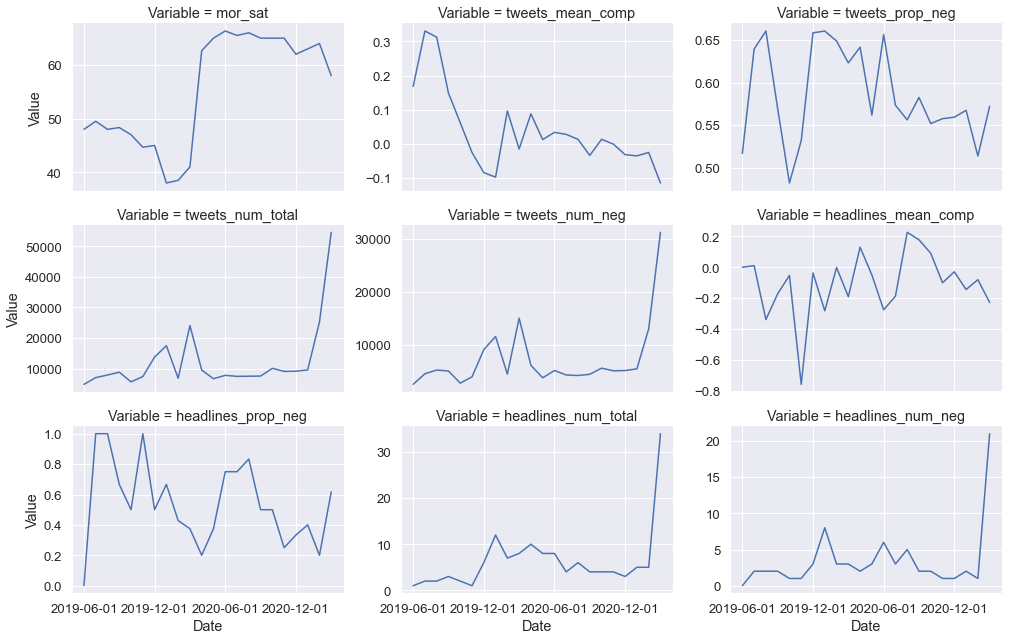

In [269]:
# Create visualisation of variables by month
g = sns.FacetGrid(data_vis, col="Variable", sharey=False, height=3, aspect=1.6, col_wrap=3)
g.map(sns.lineplot, "Date", "Value")
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
g.savefig("predictors.png")  

In [223]:
# Standardise and create train and test sets
X = data[['tweets_mean_comp', 'tweets_prop_neg', 'tweets_num_total', 'tweets_num_neg',
       'headlines_mean_comp', 'headlines_prop_neg', 'headlines_num_total', 'headlines_num_neg']]

standardised_X = preprocessing.scale(X)
y_sat = data['mor_sat'].values

X_train = standardised_X[:21]
y_sat_train = y_sat[:21]

X_test = standardised_X[-1].reshape(1, -1)
y_sat_test = y_sat[-1]

In [228]:
# Fit model
model = linear_model.LinearRegression()
model = sat_model.fit(X_train, y_sat_train)

pred_train = sat_model.predict(X_train)
pred_test = sat_model.predict(X_test)

# Evaluation on training set
mae = mean_absolute_error(y_sat_train, pred_train)
r2 = model.score(X_train, y_sat_train)
print(f'Mean absolute error on the training set was {round(mae, 2)} percentage points')
print(f'R-squared on the training set was {round(r2, 2)}')

Mean absolute error on the training set was 5.13 percentage points
R-squared on the training set was 0.57


In [229]:
# Combine actual and predicted values for data visualisation
pred_all = np.concatenate((sat_pred_train, sat_pred_test))

pred_data = pd.DataFrame({'date': data['date'], 'Actual': data['mor_sat'], 'Predicted': pred_all})
pred_data.set_index('date', inplace=True)
pred_data = pred_data.unstack().reset_index()
pred_data.columns = ['type', 'Date', 'Satisfaction Rating (%)']

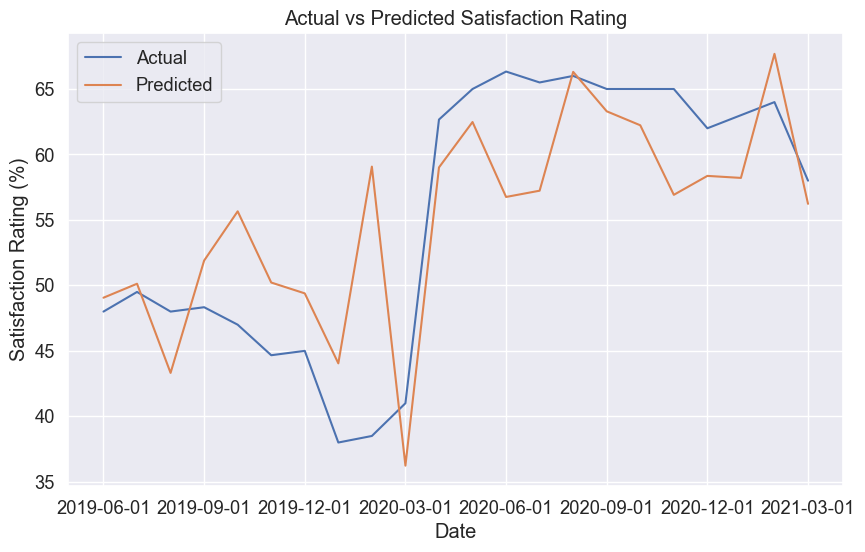

In [318]:
# Create visualisation of actual vs predicted satisfaction ratings
fig, line = plt.subplots(figsize = (10,6), dpi = 100)
line = sns.lineplot(data=pred_data, x='Date', y='Satisfaction Rating (%)', hue='type')
line.set_title('Actual vs Predicted Satisfaction Rating'); 
line.legend(title="");
sns.set(font_scale=1.2);
line.xaxis.set_major_locator(ticker.MultipleLocator(3))
fig.savefig("actual_vs_predicted.png") 

In [324]:
data.columns

Index(['date', 'size', 'mor_sat', 'mor_dis', 'tweets_mean_comp',
       'tweets_prop_neg', 'tweets_num_total', 'tweets_num_neg',
       'headlines_mean_comp', 'headlines_prop_neg', 'headlines_num_total',
       'headlines_num_neg'],
      dtype='object')

In [312]:
# Example of dashboard visualisation
eg_data = pd.DataFrame({'date': data['date'], 'Actual': data['mor_sat'], 'Predicted': pred_all})

In [313]:
eg_data = eg_data[eg_data['date'] >= '2020-06-01']
eg_data['Actual'] = eg_data.Actual[eg_data['date'] < '2021-01-01'] 
eg_data['Predicted'] = eg_data.Predicted[eg_data['date'] >= '2021-01-01']
eg_data

,date,Actual,Predicted
12,2020-06-01,66.333333,NaN
13,2020-07-01,65.500000,NaN
14,2020-08-01,66.000000,NaN
15,2020-09-01,65.000000,NaN
16,2020-10-01,65.000000,NaN
17,2020-11-01,65.000000,NaN
18,2020-12-01,62.000000,NaN
19,2021-01-01,NaN,58.209366
20,2021-02-01,NaN,67.685449
21,2021-03-01,NaN,56.229567


In [314]:
eg_data.set_index('date', inplace=True)
eg_data = eg_data.unstack().reset_index()
eg_data.columns = ['type', 'Date', 'Satisfaction Rating (%)']

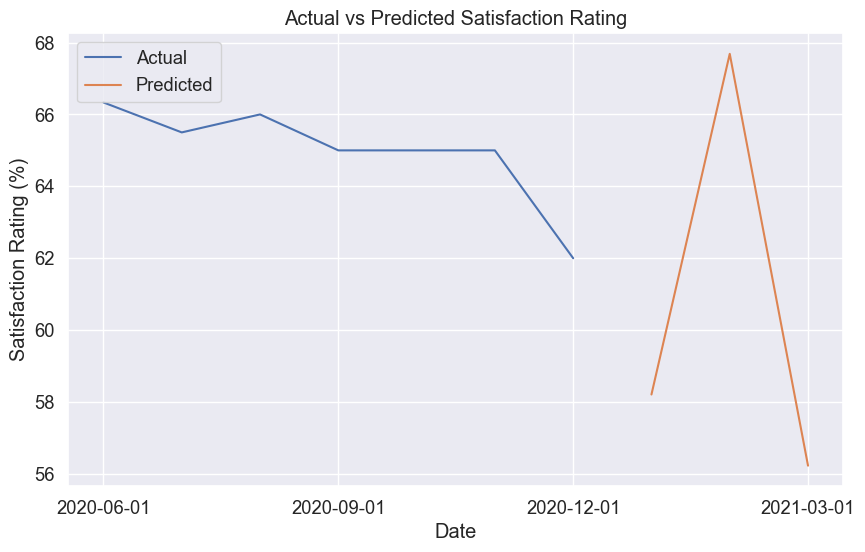

In [317]:
# Create visualisation example of hypothetical dashboard
fig, line = plt.subplots(figsize = (10,6), dpi = 100)
line = sns.lineplot(data=eg_data, x='Date', y='Satisfaction Rating (%)', hue='type')
line.set_title('Actual vs Predicted Satisfaction Rating'); 
line.legend(title="");
sns.set(font_scale=1.2);
line.xaxis.set_major_locator(ticker.MultipleLocator(3))
fig.savefig("example_dashboard.png") 